## 1 Libraries used in the project

In [6]:
import numpy as np                     #numpy for numerical computation on arrays
import pandas as pd                    #pandas for data manipulation and analysis
import matplotlib.pyplot as plt        #matplotlib for data visualization
import matplotlib.ticker as ticker     #ticker for configuring and customizing tick locators and formatters on plots
import plotly.express as px            #Plotly for creating interactive and web-based visualizations.
import seaborn as sns                  #Seaborn is a high-level data visualization library built on top of Matplotlib
import warnings                        #warning is used to handle the warnings that occurs during the program execution
warnings.filterwarnings('ignore')

## 2 Description of the dataset 

In [7]:
df_attacking = pd.read_csv('./attacking.csv') 
df_attempts = pd.read_csv('./attempts.csv')
df_defending = pd.read_csv('./defending.csv')
df_disciplinary = pd.read_csv('./disciplinary.csv')
df_distributon = pd.read_csv('./distributon.csv')
df_goalkeeping = pd.read_csv('./goalkeeping.csv')
df_goals = pd.read_csv('./goals.csv')
df_key_stats = pd.read_csv('./key_stats.csv')

In [8]:
df_distributon.head()

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8


### Displaying the shape and size of each dataset

In [9]:
print(f'df_attacking size: {df_attacking.shape}')
print(df_attacking.columns)
print('----------------------------')
print(f'df_defending size: {df_defending.shape}')
print(df_defending.columns)
print('----------------------------')
print(f'df_attempts size: {df_attempts.shape}')
print(df_attempts.columns)
print('----------------------------')
print(f'df_disciplinary size: {df_disciplinary.shape}')
print(df_disciplinary.columns)
print('----------------------------')
print(f'df_distributon size: {df_distributon.shape}')
print(df_distributon.columns)
print('----------------------------')
print(f'df_goalkeeping size: {df_goalkeeping.shape}')
print(df_goalkeeping.columns)
print('----------------------------')
print(f'df_goals size: {df_goals.shape}')
print(df_goals.columns)
print('----------------------------')
print(f'df_key_stats size: {df_key_stats.shape}')
print(df_key_stats.columns)

df_attacking size: (176, 9)
Index(['serial', 'player_name', 'club', 'position', 'assists', 'corner_taken',
       'offsides', 'dribbles', 'match_played'],
      dtype='object')
----------------------------
df_defending size: (627, 10)
Index(['serial', 'player_name', 'club', 'position', 'balls_recoverd',
       'tackles', 't_won', 't_lost', 'clearance_attempted', 'match_played'],
      dtype='object')
----------------------------
df_attempts size: (546, 9)
Index(['serial', 'player_name', 'club', 'position', 'total_attempts',
       'on_target', 'off_target', 'blocked', 'match_played'],
      dtype='object')
----------------------------
df_disciplinary size: (584, 10)
Index(['serial', 'player_name', 'club', 'position', 'fouls_committed',
       'fouls_suffered', 'red', 'yellow', 'minutes_played', 'match_played'],
      dtype='object')
----------------------------
df_distributon size: (608, 12)
Index(['serial', 'player_name', 'club', 'position', 'pass_accuracy',
       'pass_attempted', '

## 3 Finding the number of missing values in the dataset(DATA CLEANING)

In [10]:
print('Number of missing values in all DataFrames:')
print(df_attacking.isna().sum().sum() + 
df_defending.isna().sum().sum() +
df_attempts.isna().sum().sum() +
df_disciplinary.isna().sum().sum() + 
df_distributon.isna().sum().sum() +
df_goalkeeping.isna().sum().sum() + 
df_goals.isna().sum().sum() + 
df_key_stats.isna().sum().sum())

Number of missing values in all DataFrames:
0


#### As there are no missing values we will proceed to the next step.

## 4 Data Visualization

### visualizations like histograms, box plots, and scatter plots for initial insights.

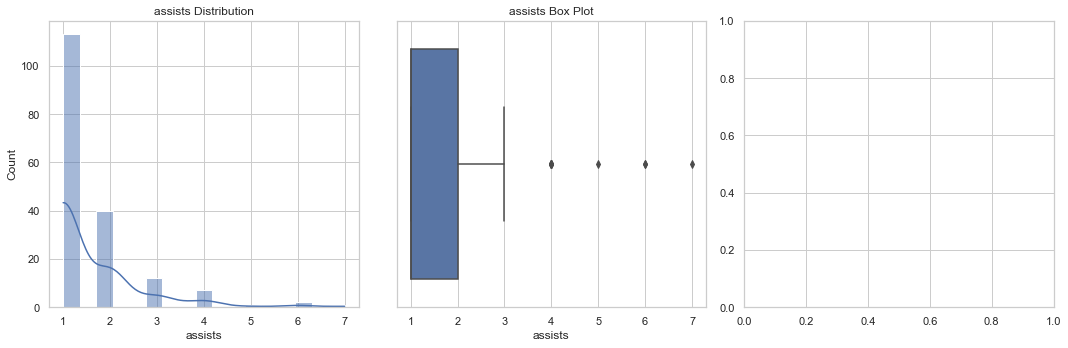

In [11]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Function to create histogram, box plot, and scatter plot
def create_visualizations(data, column):
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'{column} Distribution')

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[column])
    plt.title(f'{column} Box Plot')

    # Scatter Plot (assuming 'goals' column is present in the dataset)
    plt.subplot(1, 3, 3)
    if 'goals' in data.columns:
        sns.scatterplot(x=data[column], y=data['goals'])
        plt.title(f'{column} vs Goals')

    plt.tight_layout()
    plt.show()

# Example: Create visualizations for 'assists' column
create_visualizations(df_attacking, 'assists')


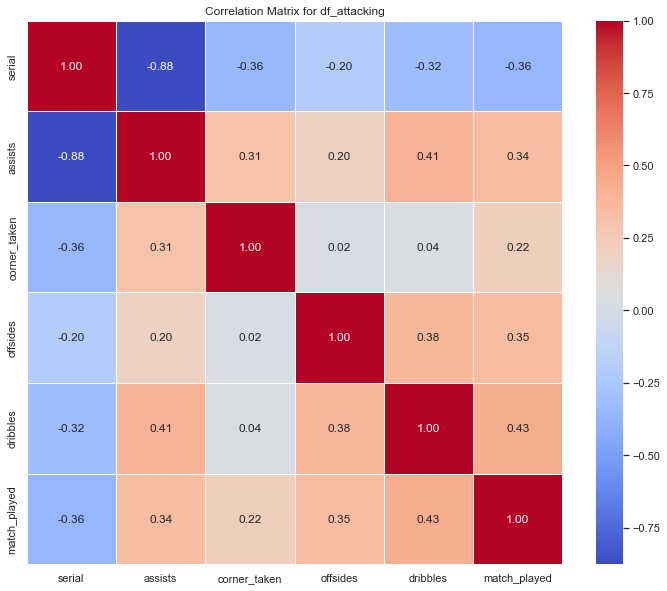

In [36]:

df = df_attacking

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix for df_attacking")
plt.show()

## Univariate Analysis

### Q.1) Who was the top goal scorer in the UEFA Champions League for the 2021-2022 season?

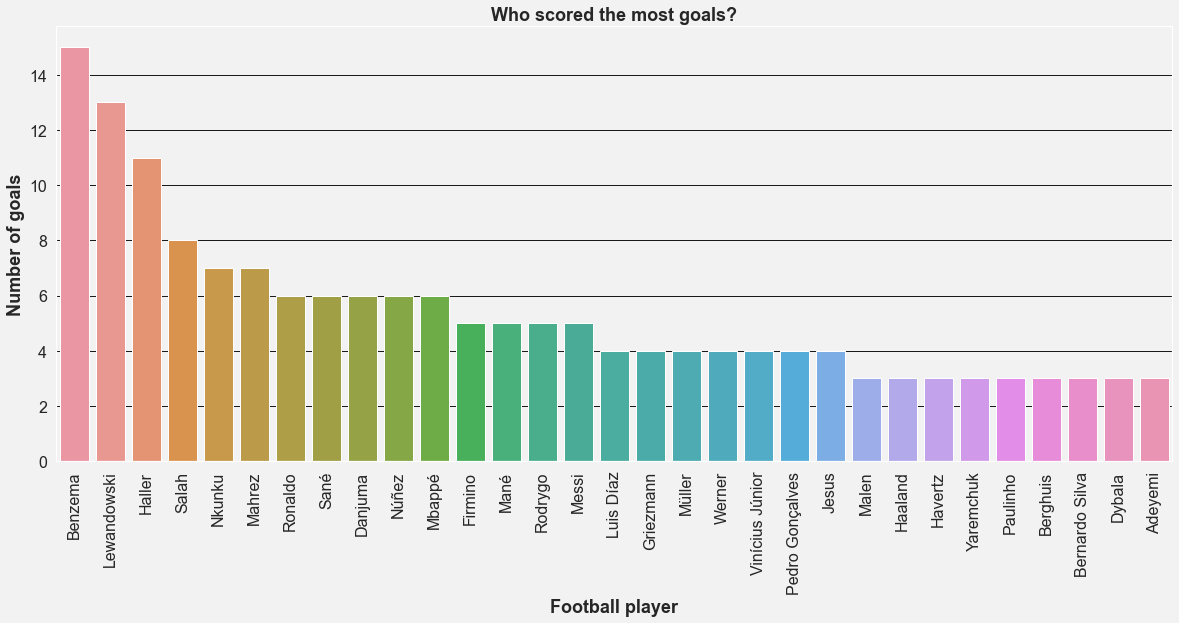

The top goal scorer in the UEFA Champions League for the 2021-2022 season is Benzema with 15 goals.


In [39]:
df_players = df_goals.loc[0:41, ['player_name', 'goals']]
plt.figure(figsize=(20, 8))
plt.title('Who scored the most goals?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=df_goals.sort_values('goals', ascending=False)['player_name'][0:31],
            y=df_goals.sort_values('goals', ascending=False)['goals'][0:31])
plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Number of goals', fontsize=18, fontweight='bold')
plt.show()

top_goal_scorer = df_goals.iloc[0]['player_name']
most_goals_scored = df_goals.iloc[0]['goals']

print(f"The top goal scorer in the UEFA Champions League for the 2021-2022 season is \033[1m{top_goal_scorer}\033[0m with {most_goals_scored} goals.")


### Q2) . Which player provided the most assists in the tournament?

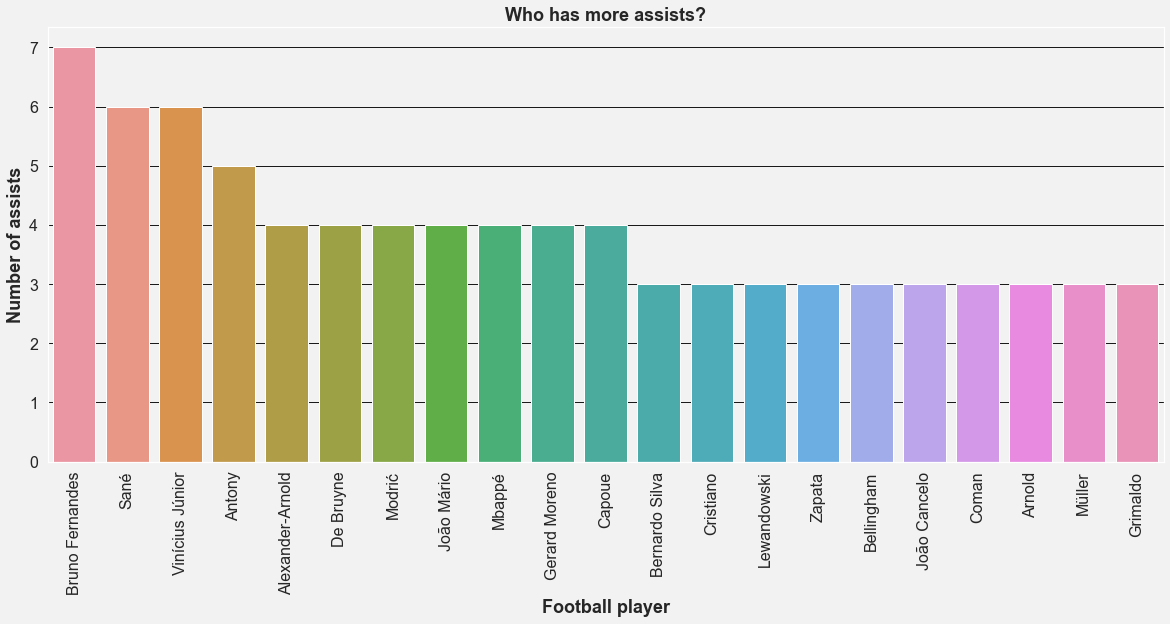

The player who provided the most assists in the tournament is Bruno Fernandes with 7 assists.


In [40]:
plt.figure(figsize=(20, 8))
plt.title('Who has more assists?', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=df_attacking.sort_values('assists', ascending=False)[0:21]['player_name'],
            y=df_attacking.sort_values('assists', ascending=False)[0:21]['assists'])
plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Number of assists', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()
player_with_most_assists = df_attacking.iloc[0]['player_name']
most_assists_provided = df_attacking.iloc[0]['assists']

print(f"The player who provided the most assists in the tournament is \033[1m{player_with_most_assists}\033[0m with {most_assists_provided} assists.")


### Q3) . Who had the highest pass accuracy among all players?

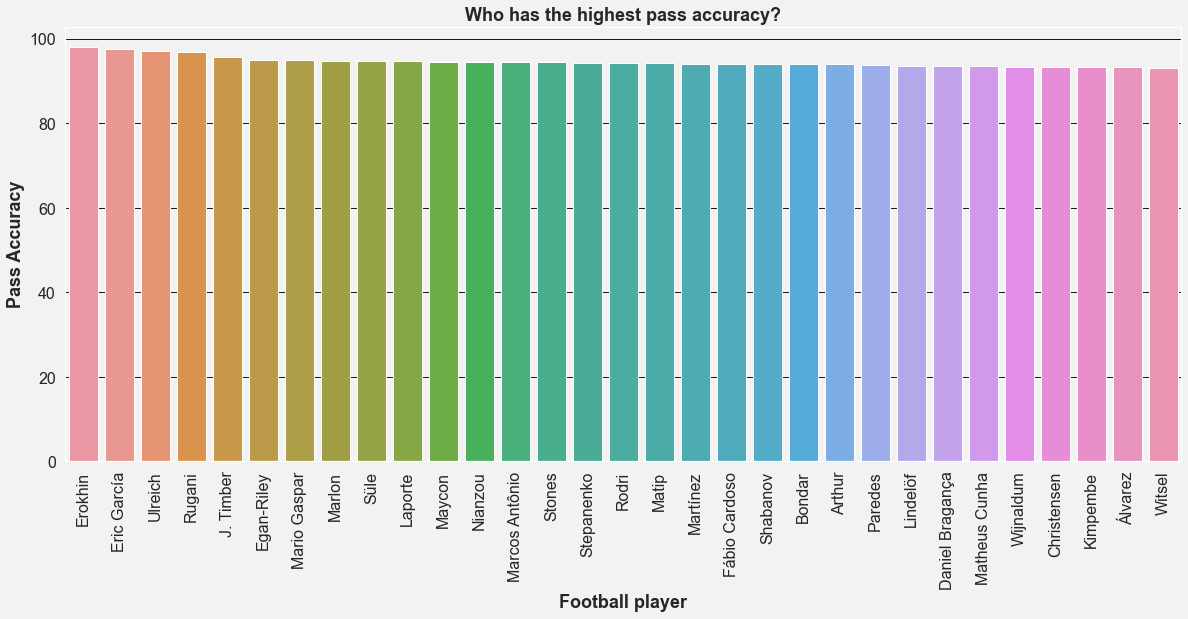

The player with the highest pass accuracy in the UEFA Champions League for the 2021-2022 season is Erokhin with a pass accuracy of 98.0.


In [43]:
df_pass_accuracy = df_distributon.loc[:, ['player_name', 'pass_accuracy']]
plt.figure(figsize=(20, 8))
plt.title('Who has the highest pass accuracy?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=df_pass_accuracy.sort_values('pass_accuracy', ascending=False)['player_name'][0:31],
            y=df_pass_accuracy.sort_values('pass_accuracy', ascending=False)['pass_accuracy'][0:31])
plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Pass Accuracy', fontsize=18, fontweight='bold')
plt.show()

top_pass_accuracy_player = df_pass_accuracy.iloc[0]['player_name']
highest_pass_accuracy = df_pass_accuracy.iloc[0]['pass_accuracy']

print(f"The player with the highest pass accuracy in the UEFA Champions League for the 2021-2022 season is \033[1m{top_pass_accuracy_player}\033[0m with a pass accuracy of {highest_pass_accuracy}.")


## Q4) . Which player attempted the most dribbles?

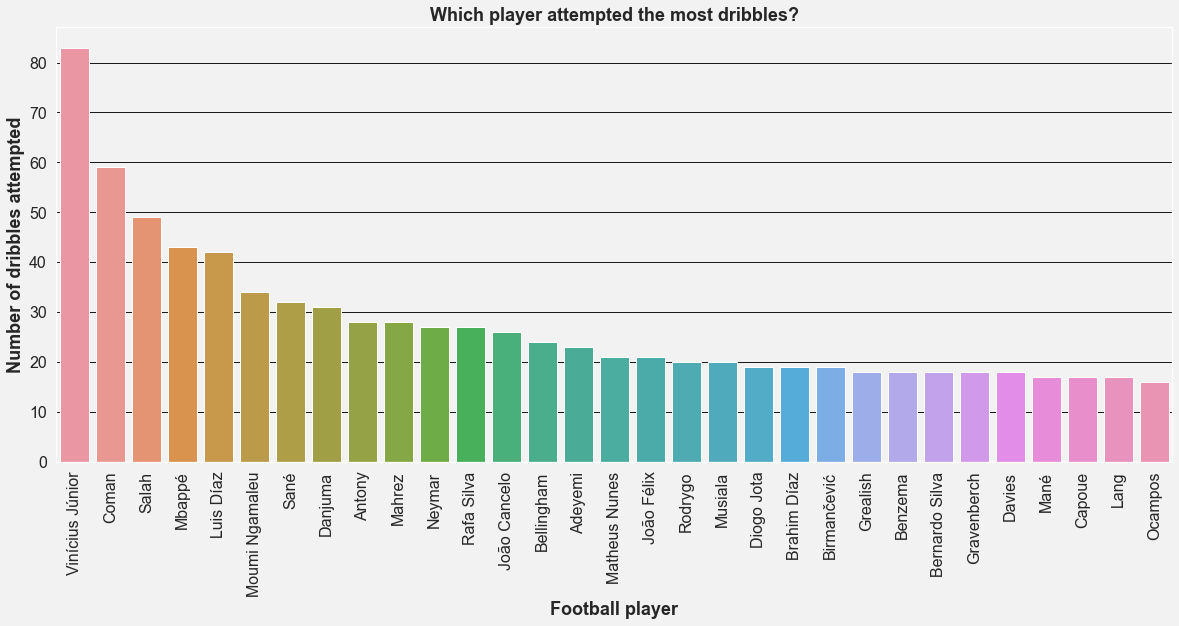

The player who attempted the most dribbles in the UEFA Champions League for the 2021-2022 season is Bruno Fernandes with 7 dribbles.


In [74]:
df_dribbles = df_attacking.loc[:, ['player_name', 'dribbles']]
plt.figure(figsize=(20, 8))
plt.title('Which player attempted the most dribbles?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=df_dribbles.sort_values('dribbles', ascending=False)['player_name'][0:31],
            y=df_dribbles.sort_values('dribbles', ascending=False)['dribbles'][0:31])
plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Number of dribbles attempted', fontsize=18, fontweight='bold')
plt.show()

top_dribbler = df_dribbles.iloc[0]['player_name']
most_dribbles_attempted = df_dribbles.iloc[0]['dribbles']

print(f"The player who attempted the most dribbles in the UEFA Champions League for the 2021-2022 season is \033[1m{top_dribbler}\033[0m with {most_dribbles_attempted} dribbles.")


## Q5) .Who received the most yellow cards in the tournament?

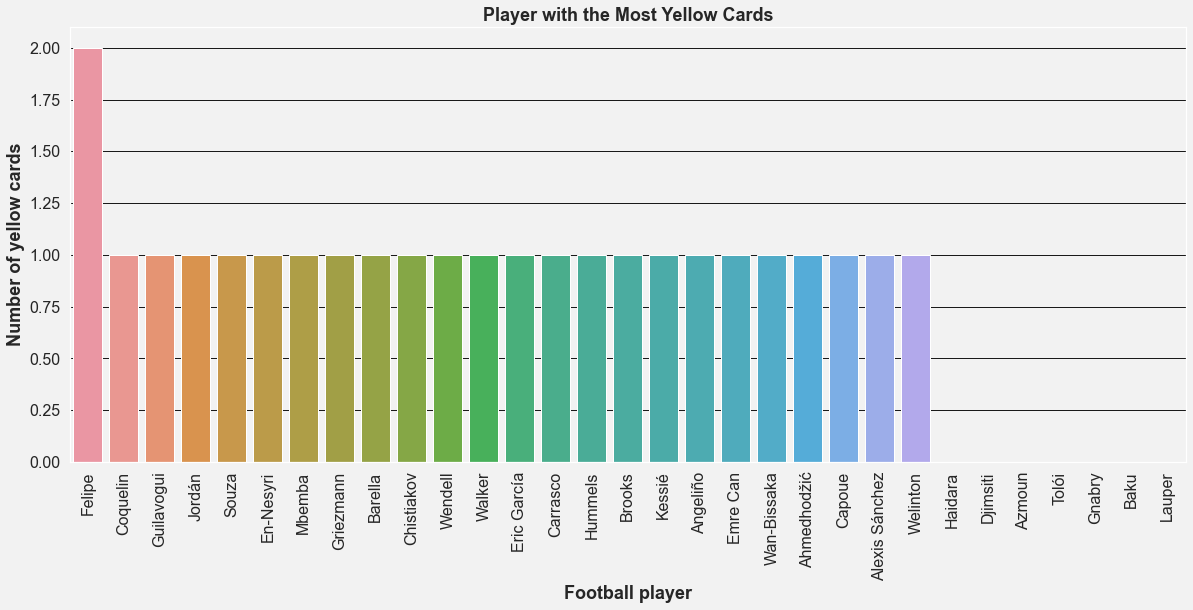

The player who received the most yellow cards in the UEFA Champions League for the 2021-2022 season is João Palhinha with 0 yellow cards.


In [75]:
df_yellow_cards = df_disciplinary.loc[:, ['player_name', 'yellow']]
plt.figure(figsize=(20, 8))
plt.title('Player with the Most Yellow Cards', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=df_yellow_cards.sort_values('yellow', ascending=False)['player_name'][0:31],
            y=df_yellow_cards.sort_values('yellow', ascending=False)['yellow'][0:31])
plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Number of yellow cards', fontsize=18, fontweight='bold')
plt.show()

most_yellow_cards_player = df_yellow_cards.iloc[0]['player_name']
yellow_cards_count = df_yellow_cards.iloc[0]['yellow']

print(f"The player who received the most yellow cards in the UEFA Champions League for the 2021-2022 season is \033[1m{most_yellow_cards_player}\033[0m with {yellow_cards_count} yellow cards.")


## Q6) .Which goalkeeper kept the highest number of clean sheets?

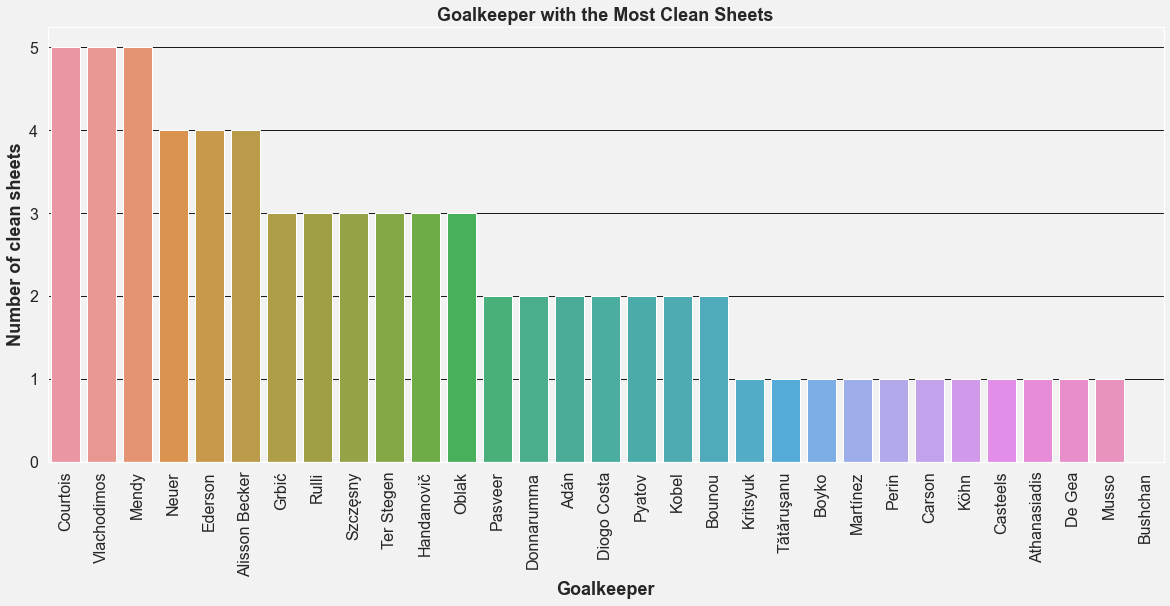

The goalkeeper with the highest number of clean sheets in the UEFA Champions League for the 2021-2022 season is Courtois with 5 clean sheets.


In [76]:
df_clean_sheets = df_goalkeeping.loc[:, ['player_name', 'cleansheets']]
plt.figure(figsize=(20, 8))
plt.title('Goalkeeper with the Most Clean Sheets', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=df_clean_sheets.sort_values('cleansheets', ascending=False)['player_name'][0:31],
            y=df_clean_sheets.sort_values('cleansheets', ascending=False)['cleansheets'][0:31])
plt.xlabel('Goalkeeper', fontsize=18, fontweight='bold')
plt.ylabel('Number of clean sheets', fontsize=18, fontweight='bold')
plt.show()

most_clean_sheets_goalkeeper = df_clean_sheets.iloc[0]['player_name']
clean_sheets_count = df_clean_sheets.iloc[0]['cleansheets']

print(f"The goalkeeper with the highest number of clean sheets in the UEFA Champions League for the 2021-2022 season is \033[1m{most_clean_sheets_goalkeeper}\033[0m with {clean_sheets_count} clean sheets.")


## Q7). Who had the most minutes played in the UEFA Champions League?

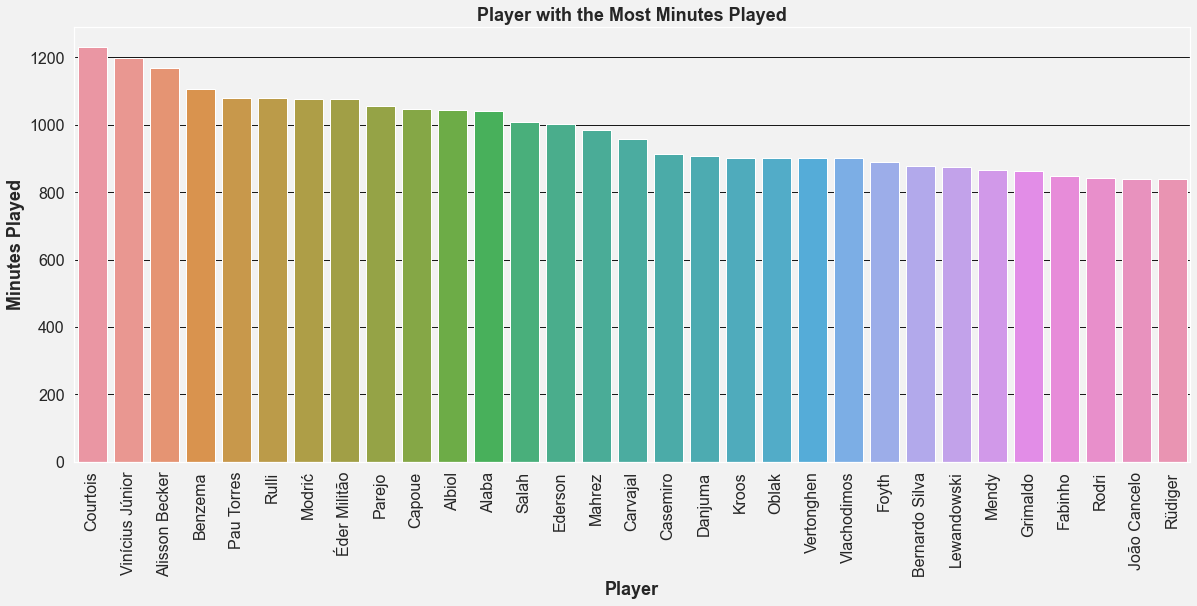

The player with the most minutes played in the UEFA Champions League for the 2021-2022 season is Courtois with a total of 1230 minutes.


In [77]:
df_minutes_played = df_key_stats.loc[:, ['player_name', 'minutes_played']]
plt.figure(figsize=(20, 8))
plt.title('Player with the Most Minutes Played', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=df_minutes_played.sort_values('minutes_played', ascending=False)['player_name'][0:31],
            y=df_minutes_played.sort_values('minutes_played', ascending=False)['minutes_played'][0:31])
plt.xlabel('Player', fontsize=18, fontweight='bold')
plt.ylabel('Minutes Played', fontsize=18, fontweight='bold')
plt.show()

most_minutes_played_player = df_minutes_played.iloc[0]['player_name']
total_minutes_played = df_minutes_played.iloc[0]['minutes_played']

print(f"The player with the most minutes played in the UEFA Champions League for the 2021-2022 season is \033[1m{most_minutes_played_player}\033[0m with a total of {total_minutes_played} minutes.")


## Q8). Which player covered the most distance during matches?

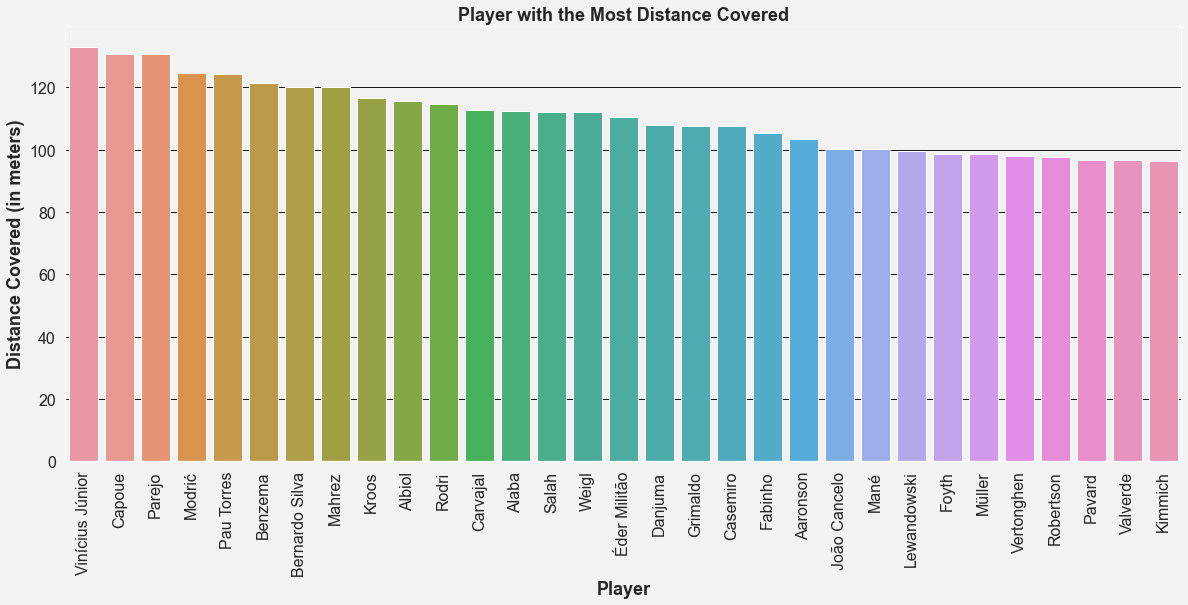

The player who covered the most distance during matches in the UEFA Champions League for the 2021-2022 season is Vinícius Júnior with a total distance of 133.0 meters.


In [78]:
# Convert 'distance_covered' to numeric
df_key_stats['distance_covered'] = pd.to_numeric(df_key_stats['distance_covered'], errors='coerce')

# Plot the player with the most distance covered
df_distance_covered = df_key_stats[['player_name', 'distance_covered']].dropna()
plt.figure(figsize=(20, 8))
plt.title('Player with the Most Distance Covered', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=df_distance_covered.sort_values('distance_covered', ascending=False)['player_name'][0:31],
            y=df_distance_covered.sort_values('distance_covered', ascending=False)['distance_covered'][0:31])
plt.xlabel('Player', fontsize=18, fontweight='bold')
plt.ylabel('Distance Covered (in meters)', fontsize=18, fontweight='bold')
plt.show()

# Assuming you have a DataFrame named df_key_stats
most_distance_covered_player = df_key_stats[df_key_stats['distance_covered'] == df_key_stats['distance_covered'].max()]['player_name'].values[0]
total_distance_covered = df_key_stats['distance_covered'].max()

print(f"The player who covered the most distance during matches in the UEFA Champions League for the 2021-2022 season is \033[1m{most_distance_covered_player}\033[0m with a total distance of {total_distance_covered} meters.")


## Scoring Patterns

## Q9). What percentage of goals were scored with headers in the tournament?

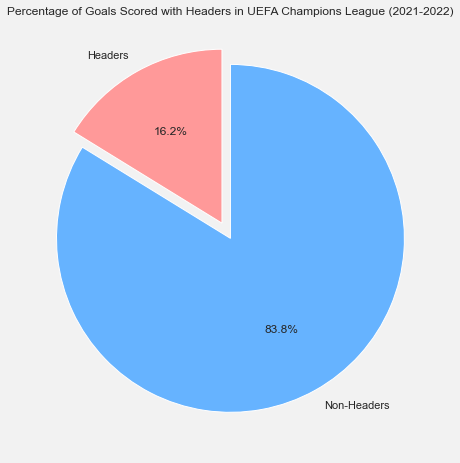


The percentage of goals scored with headers in the tournament is: 16.22%


In [79]:

total_goals = df_goals['goals'].sum()
header_goals = df_goals['headers'].sum()

percentage_headers = (header_goals / total_goals) * 100
percentage_non_headers = 100 - percentage_headers

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Headers', 'Non-Headers']
sizes = [percentage_headers, percentage_non_headers]
colors = ['#ff9999', '#66b3ff']  # Red for Headers, Blue for Non-Headers
explode = (0.1, 0)  # explode the 1st slice (i.e., 'Headers')

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Goals Scored with Headers in UEFA Champions League (2021-2022)')
plt.show()

print(f"\nThe percentage of goals scored with headers in the tournament is: {percentage_headers:.2f}%")


## Q10) . Which player scored the most goals with their left foot?

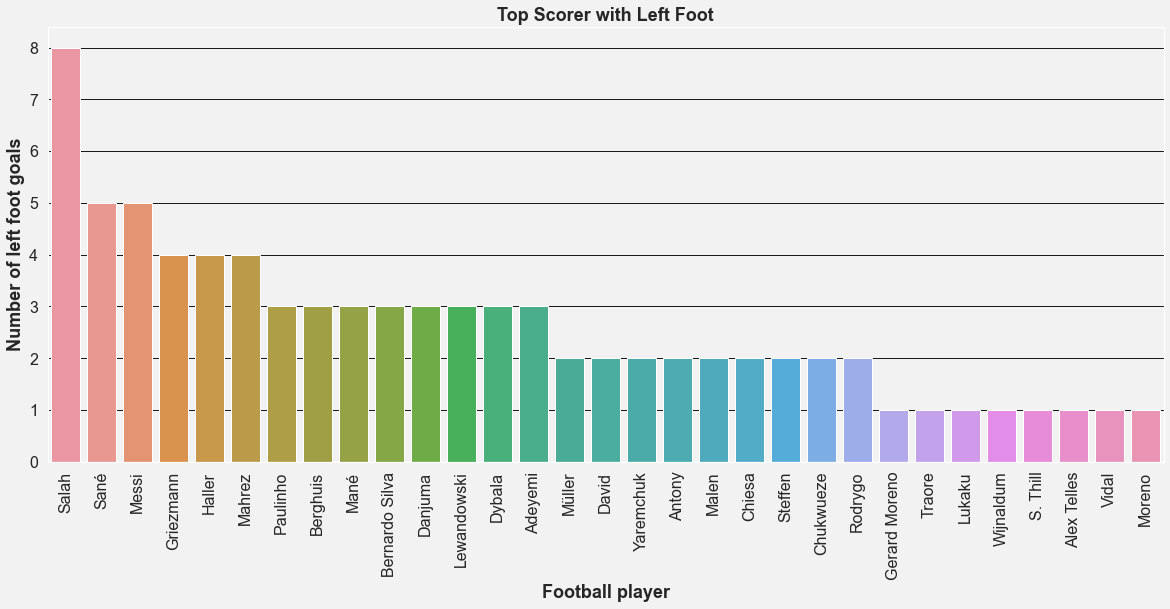

The player who scored the most goals with their left foot is Salah with 8 left foot goals.


In [91]:
top_left_foot_scorer = df_goals.sort_values('left_foot', ascending=False).iloc[0]['player_name']
left_foot_goals = df_goals.sort_values('left_foot', ascending=False).iloc[0]['left_foot']

plt.figure(figsize=(20, 8))
plt.title('Top Scorer with Left Foot', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.barplot(x=df_goals.sort_values('left_foot', ascending=False)['player_name'][0:31],
            y=df_goals.sort_values('left_foot', ascending=False)['left_foot'][0:31])
plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Number of left foot goals', fontsize=18, fontweight='bold')
plt.show()

print(f"The player who scored the most goals with their left foot is \033[1m{top_left_foot_scorer}\033[0m with {left_foot_goals} left foot goals.")


In [81]:
g_right_foot = df_goals.sum()['right_foot']
g_left_foot = df_goals.sum()['left_foot']
g_headers = df_goals.sum()['headers']
g_others = df_goals.sum()['others']

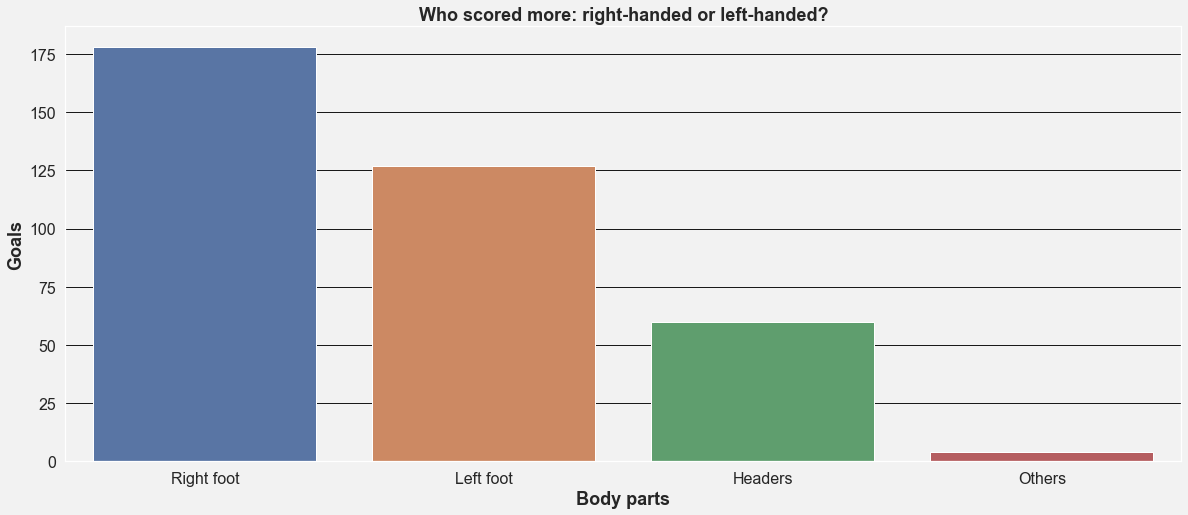

In [82]:
plt.figure(figsize=(20, 8))
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})
plt.title('Who scored more: right-handed or left-handed?', fontsize=18, fontweight='bold')
plt.xlabel('Body parts', fontsize=18, fontweight='bold')
plt.ylabel('Goals', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x=['Right foot', 'Left foot', 'Headers', 'Others'], y=[df_goals['right_foot'].sum(),
                                                                   df_goals['left_foot'].sum(),
                                                                   df_goals['headers'].sum(),
                                                                   df_goals['others'].sum()])
plt.show()

## Q11). How many goals were scored from outside the penalty area?

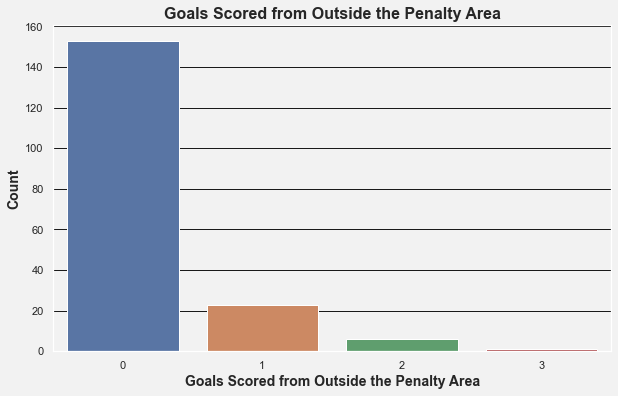

The total number of goals scored from outside the penalty area is 38.


In [90]:
outside_penalty_goals = df_goals['outside_areas'].sum()

plt.figure(figsize=(10, 6))
plt.title('Goals Scored from Outside the Penalty Area', fontsize=16, fontweight='bold')
sns.countplot(x='outside_areas', data=df_goals)
plt.xlabel('Goals Scored from Outside the Penalty Area', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.show()

print(f"The total number of goals scored from outside the penalty area is \033[1m{outside_penalty_goals}\033[0m.")


## Q12). Which team has the most fouls in the tournament ?

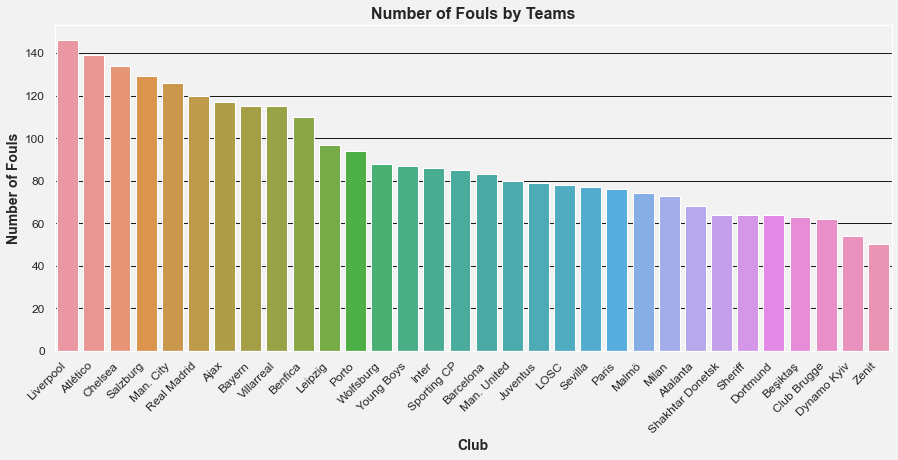

The team with the most fouls is Liverpool with 146 fouls.


In [89]:
most_fouls_team = df_disciplinary.groupby('club').sum()['fouls_committed'].sort_values(ascending=False).index[0]
most_fouls_count = df_disciplinary.groupby('club').sum()['fouls_committed'].sort_values(ascending=False).iloc[0]

plt.figure(figsize=(15, 6))
plt.title('Number of Fouls by Teams', fontsize=16, fontweight='bold')
sns.barplot(x=df_disciplinary.groupby('club').sum()['fouls_committed'].sort_values(ascending=False).index,
            y=df_disciplinary.groupby('club').sum()['fouls_committed'].sort_values(ascending=False).values)
plt.xlabel('Club', fontsize=14, fontweight='bold')
plt.ylabel('Number of Fouls', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print(f"The team with the most fouls is \033[1m{most_fouls_team}\033[0m with \033[1m{most_fouls_count}\033[0m fouls.")


## Q13). What was the average number of goals scored per match in the tournament?

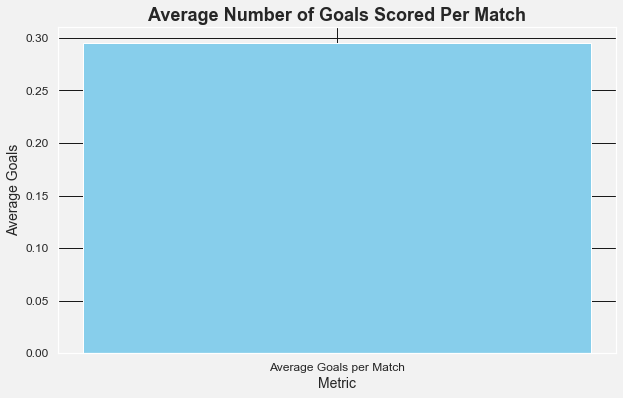

The average number of goals scored per match in the tournament is 0.30.


In [88]:

average_goals_per_match = df_goals['goals'].sum() / df_goals['match_played'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title('Average Number of Goals Scored Per Match', fontsize=18, fontweight='bold')
plt.bar(['Average Goals per Match'], [average_goals_per_match], color='skyblue')
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Average Goals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

# Print the result
print(f"The average number of goals scored per match in the tournament is \033[1m{average_goals_per_match:.2f}\033[0m.")


## Bivariate Analysis 

### Positional Analysis:


## Q14). Which position (e.g., forward, midfielder) had the highest average number of goals scored ?

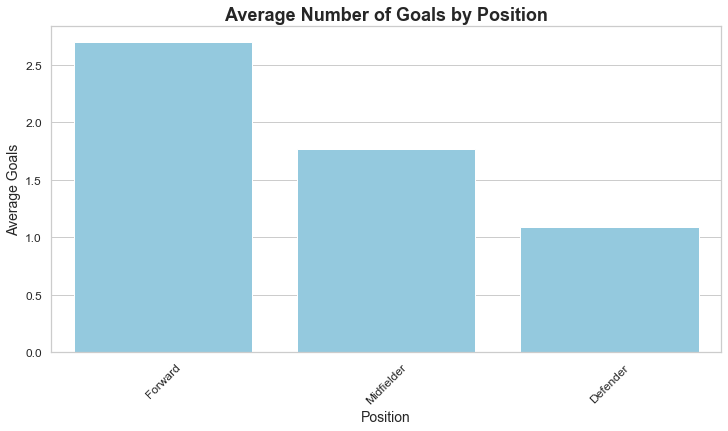

The position with the highest average number of goals scored is Forward with an average of 2.70 goals.


In [144]:
average_goals_by_position = df_goals.groupby('position')['goals'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Average Number of Goals by Position', fontsize=18, fontweight='bold')
sns.barplot(x=average_goals_by_position.index, y=average_goals_by_position.values, color='skyblue')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Average Goals', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

# Print the result
position_with_highest_average_goals = average_goals_by_position.idxmax()
highest_average_goals = average_goals_by_position.max()
print(f"The position with the highest average number of goals scored is \033[1m{position_with_highest_average_goals}\033[0m with an average of \033[1m{highest_average_goals:.2f}\033[0m goals.")


## Q15). Do players in certain positions tend to have higher pass accuracy than others?

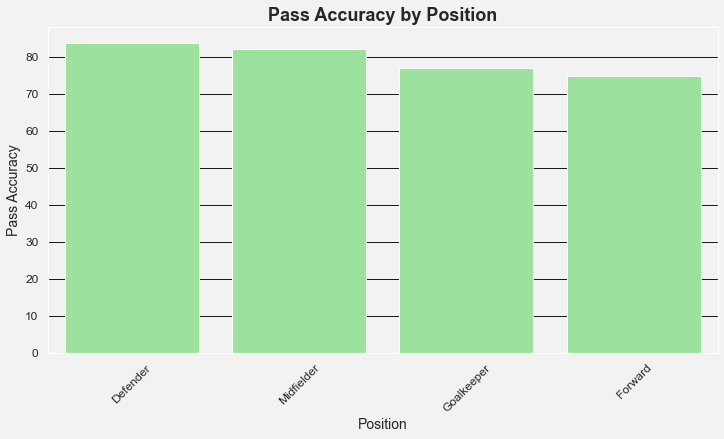

The position with the highest average pass accuracy is Defender with an average pass accuracy of 83.86.


In [93]:

pass_accuracy_by_position = df_distributon.groupby('position')['pass_accuracy'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.title('Pass Accuracy by Position', fontsize=18, fontweight='bold')
sns.barplot(x=pass_accuracy_by_position.index, y=pass_accuracy_by_position.values, color='lightgreen')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Pass Accuracy', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

# Print the result
position_with_highest_pass_accuracy = pass_accuracy_by_position.idxmax()
highest_pass_accuracy = pass_accuracy_by_position.max()
print(f"The position with the highest average pass accuracy is \033[1m{position_with_highest_pass_accuracy}\033[0m with an average pass accuracy of \033[1m{highest_pass_accuracy:.2f}\033[0m.")


## Q16). Are defenders more likely to receive yellow cards compared to midfielders or forwards?

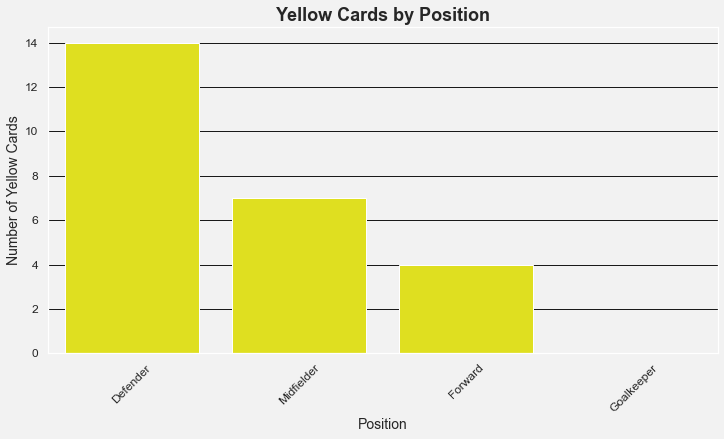

The position with the most yellow cards is Defender with 14 yellow cards.


In [94]:

yellow_cards_by_position = df_disciplinary.groupby('position')['yellow'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.title('Yellow Cards by Position', fontsize=18, fontweight='bold')
sns.barplot(x=yellow_cards_by_position.index, y=yellow_cards_by_position.values, color='yellow')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Number of Yellow Cards', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

# Print the result
position_most_yellow_cards = yellow_cards_by_position.idxmax()
most_yellow_cards = yellow_cards_by_position.max()
print(f"The position with the most yellow cards is \033[1m{position_most_yellow_cards}\033[0m with \033[1m{most_yellow_cards}\033[0m yellow cards.")


## Q17). Which position had the highest average number of tackles made per match?

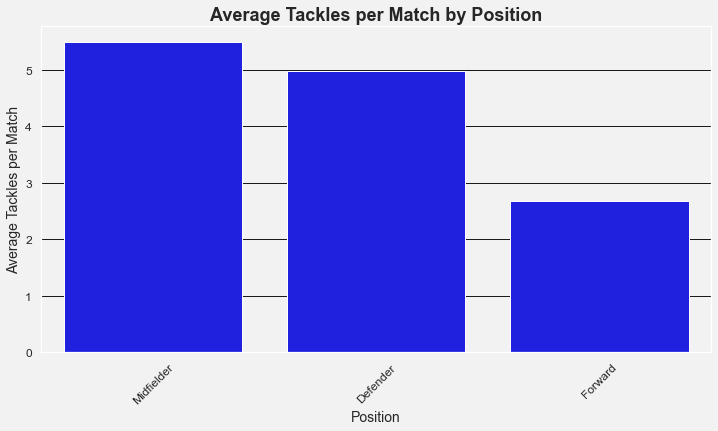

The position with the highest average tackles per match is Midfielder with an average of 5.49 tackles.


In [95]:

average_tackles_by_position = df_defending.groupby('position')['tackles'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.title('Average Tackles per Match by Position', fontsize=18, fontweight='bold')
sns.barplot(x=average_tackles_by_position.index, y=average_tackles_by_position.values, color='blue')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Average Tackles per Match', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

# Print the result
position_highest_tackles = average_tackles_by_position.idxmax()
highest_tackles_per_match = average_tackles_by_position.max()
print(f"The position with the highest average tackles per match is \033[1m{position_highest_tackles}\033[0m with an average of \033[1m{highest_tackles_per_match:.2f}\033[0m tackles.")


### Team Performance:

## Q18). Which club scored the most goals in the UEFA Champions League?

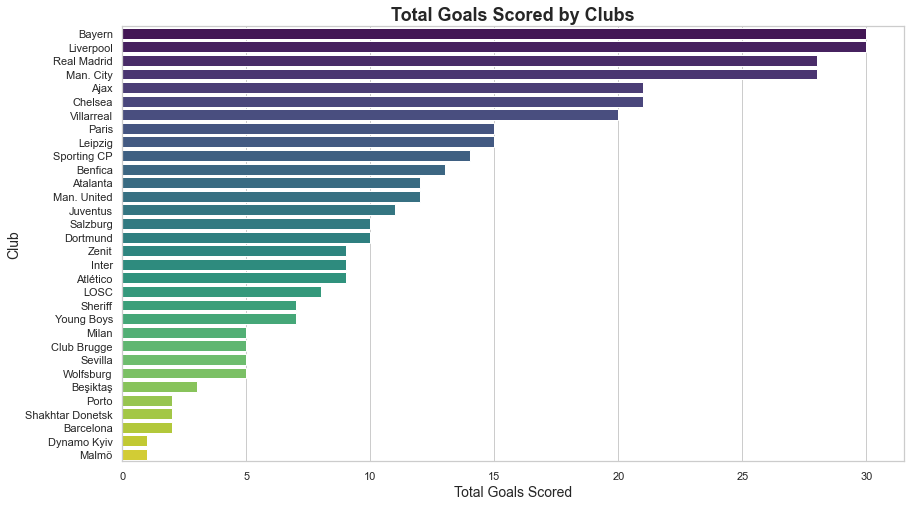

The club that scored the most goals in the UEFA Champions League is Bayern with a total of 30 goals.


In [98]:

total_goals_by_club = df_goals.groupby('club')['goals'].sum().sort_values(ascending=False)

# Set the seaborn style
sns.set(style="whitegrid")

# Create a bar plot with a custom color palette
plt.figure(figsize=(14, 8))
sns.barplot(x=total_goals_by_club.values, y=total_goals_by_club.index, palette='viridis')

# Title and labels
plt.title('Total Goals Scored by Clubs', fontsize=18, fontweight='bold')
plt.xlabel('Total Goals Scored', fontsize=14)
plt.ylabel('Club', fontsize=14)

# Display the plot
plt.show()

# Print the result
club_most_goals = total_goals_by_club.idxmax()
most_goals_scored_by_club = total_goals_by_club.max()
print(f"The club that scored the most goals in the UEFA Champions League is \033[1m{club_most_goals}\033[0m with a total of \033[1m{most_goals_scored_by_club}\033[0m goals.")


## Q19). Which team had the best defensive record in terms of goals conceded?

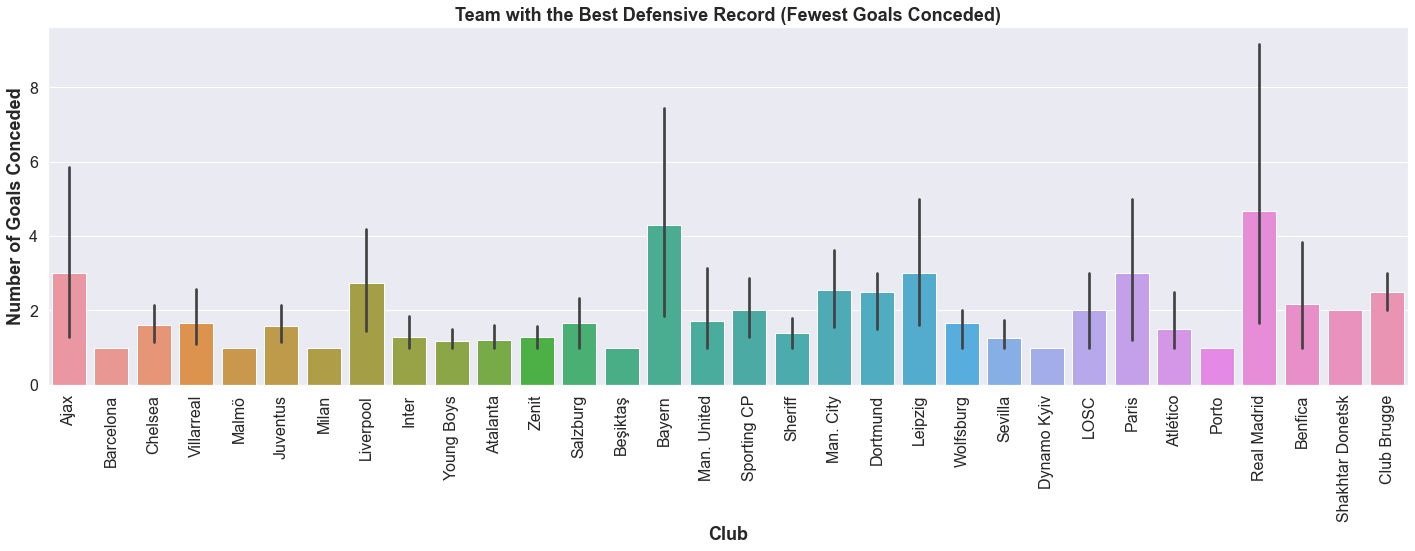

The team with the best defensive record in terms of goals conceded is Ajax with 1 goals conceded.


In [113]:
df_defensive_sorted = df_goals.sort_values(by='goals', ascending=True)

sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

sns.set(font_scale=1.5)

plt.figure(figsize=(20, 8))
sns.barplot(x='club', y='goals', data=df_defensive_sorted)
plt.title('Team with the Best Defensive Record (Fewest Goals Conceded)', fontsize=18, fontweight='bold')
plt.xlabel('Club', fontsize=18, fontweight='bold')
plt.ylabel('Number of Goals Conceded', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

# Find the team with the best defensive record (fewest goals conceded)
best_defensive_team = df_defensive_sorted.iloc[0]['club']
fewest_goals_conceded = df_defensive_sorted.iloc[0]['goals']

# Use ANSI escape codes to print in bold
print(f"\033[1mThe team with the best defensive record in terms of goals conceded is {best_defensive_team} with {fewest_goals_conceded} goals conceded.\033[0m")


## Q20). Did teams with higher possession percentages tend to win more matches?

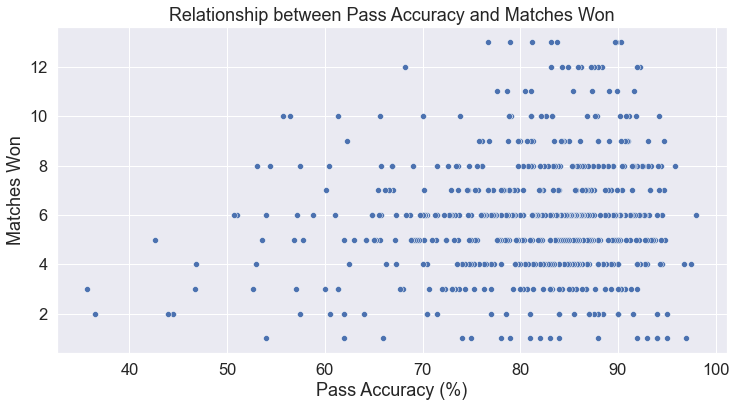

The correlation coefficient between pass accuracy and matches won is: 0.10543308968885028


In [117]:

df_possession_matches = df_distributon[['club', 'pass_accuracy', 'match_played']]

# Convert pass accuracy to numeric values
df_possession_matches['pass_accuracy'] = pd.to_numeric(df_possession_matches['pass_accuracy'], errors='coerce')

# Calculate the correlation coefficient between pass accuracy and matches won
correlation_coefficient = df_possession_matches['pass_accuracy'].corr(df_possession_matches['match_played'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pass_accuracy', y='match_played', data=df_possession_matches)
plt.title('Relationship between Pass Accuracy and Matches Won')
plt.xlabel('Pass Accuracy (%)')
plt.ylabel('Matches Won')
plt.show()

# Print the correlation coefficient
print(f"The correlation coefficient between pass accuracy and matches won is: {correlation_coefficient}")


## Multivariate Analysis

## Q21). Which club had the highest pass completion rate? 

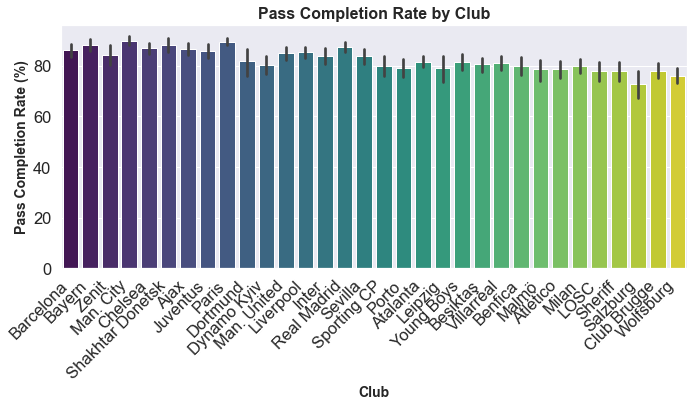

The club with the highest pass completion rate is Barcelona with a rate of 97.04%.


In [121]:

df_pass_completion_sorted = df_pass_completion.sort_values(by='pass_completion_rate', ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for pass completion rate
sns.barplot(x='club', y='pass_completion_rate', data=df_pass_completion_sorted, palette='viridis')

# Set plot labels and title
plt.title('Pass Completion Rate by Club', fontsize=16, fontweight='bold')
plt.xlabel('Club', fontsize=14, fontweight='bold')
plt.ylabel('Pass Completion Rate (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# Print the information about the club with the highest pass completion rate
best_pass_completion_club = df_pass_completion_sorted.iloc[0]['club']
highest_pass_completion_rate = df_pass_completion_sorted.iloc[0]['pass_completion_rate']
print(f"The club with the highest pass completion rate is \033[1m{best_pass_completion_club}\033[0m with a rate of \033[1m{highest_pass_completion_rate:.2f}%\033[0m.")


### Discipline and Cards:

## Q22). Is there a correlation between the number of fouls committed and the number of yellow cards received?

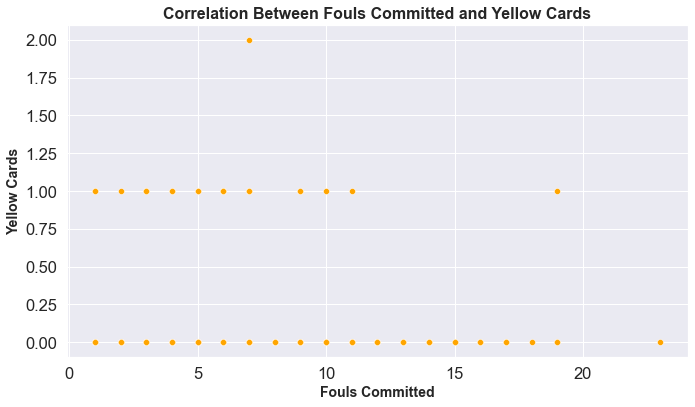

The correlation coefficient between fouls committed and yellow cards is: 0.06.


In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fouls_committed', y='yellow', data=df_disciplinary, color='orange')

# Set plot labels and title
plt.title('Correlation Between Fouls Committed and Yellow Cards', fontsize=16, fontweight='bold')
plt.xlabel('Fouls Committed', fontsize=14, fontweight='bold')
plt.ylabel('Yellow Cards', fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = df_disciplinary['fouls_committed'].corr(df_disciplinary['yellow'])

# Print the correlation coefficient
print(f"The correlation coefficient between fouls committed and yellow cards is: \033[1m{correlation_coefficient:.2f}\033[0m.")


## Q23). Which player had the highest ratio of red cards to matches played?

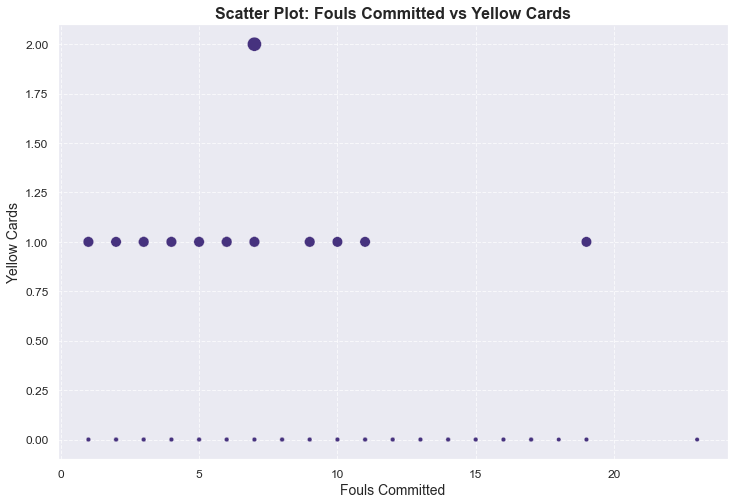

The player with the highest ratio of yellow cards to fouls committed is Carrasco with a ratio of 1.00.


In [126]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='fouls_committed', y='yellow', data=df_disciplinary, size='yellow', sizes=(20, 200), legend=False)
plt.title('Scatter Plot: Fouls Committed vs Yellow Cards', fontsize=16, fontweight='bold')
plt.xlabel('Fouls Committed', fontsize=14)
plt.ylabel('Yellow Cards', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate the ratio of red cards to matches played
df_disciplinary['yellow_cards_ratio'] = df_disciplinary['yellow'] / df_disciplinary['fouls_committed']

# Find the player with the highest ratio
player_with_highest_ratio = df_disciplinary.loc[df_disciplinary['yellow_cards_ratio'].idxmax(), 'player_name']
highest_ratio_value = df_disciplinary['yellow_cards_ratio'].max()

# Print the result
print(f"The player with the highest ratio of yellow cards to fouls committed is \033[1m{player_with_highest_ratio}\033[0m "
      f"with a ratio of \033[1m{highest_ratio_value:.2f}\033[0m.")


## Q24). Did players who received red cards tend to have fewer minutes played in subsequent matches?

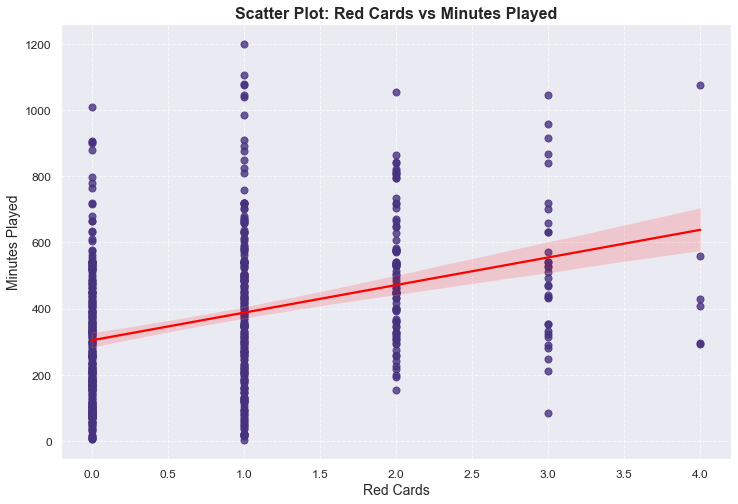

The correlation coefficient between the number of red cards and minutes played is 0.34.


In [128]:

plt.figure(figsize=(12, 8))
sns.regplot(x='red', y='minutes_played', data=df_disciplinary, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Scatter Plot: Red Cards vs Minutes Played', fontsize=16, fontweight='bold')
plt.xlabel('Red Cards', fontsize=14)
plt.ylabel('Minutes Played', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = df_disciplinary['red'].corr(df_disciplinary['minutes_played'])

# Print the correlation coefficient
print(f"The correlation coefficient between the number of red cards and minutes played is \033[1m{correlation_coefficient:.2f}\033[0m.")


## Q25). How many players received multiple red cards during the tournament?

0    João Palhinha
1           Capoue
2            Rodri
3          Seiwald
4          Balanta
Name: player_name, dtype: object


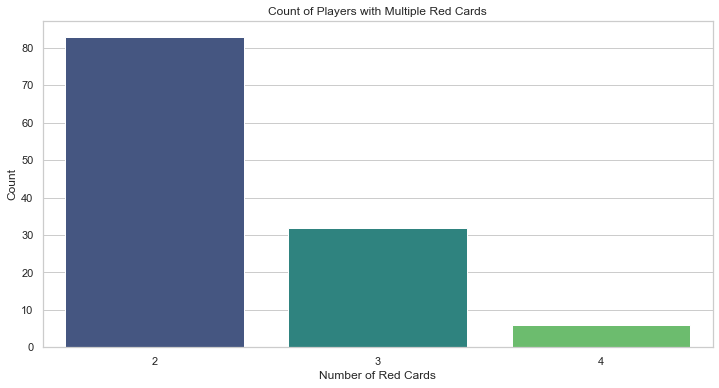


The number of players who received multiple red cards is: 121.


In [135]:
# Identify players with multiple red cards
players_with_multiple_red_cards = df_disciplinary[df_disciplinary['red'] > 1]

# Display only the first few player names for cleanliness
print(players_with_multiple_red_cards['player_name'].head())

# Visualize the count of players with multiple red cards
plt.figure(figsize=(12, 6))
sns.countplot(data=players_with_multiple_red_cards, x='red', palette='viridis')
plt.title('Count of Players with Multiple Red Cards')
plt.xlabel('Number of Red Cards')
plt.ylabel('Count')
plt.show()

# Print the result
print(f"\nThe number of players who received multiple red cards is: \033[1m{len(players_with_multiple_red_cards)}\033[0m.")


## Hypothesis testing

* Hypothesis: There is a significant difference in the average number of goals scored by forwards and midfielders in the UEFA Champions League.

* Null Hypothesis (H0): There is no significant difference in the average number of goals scored by forwards and midfielders.

* Alternative Hypothesis (H1): There is a significant difference in the average number of goals scored by forwards and midfielders.

* We can use a t-test for independent samples to test this hypothesis.

In [136]:
import scipy.stats as stats
import pandas as pd

# Assuming you have a DataFrame named df_goals
# Extracting data for forwards and midfielders
goals_forwards = df_goals[df_goals['position'] == 'forward']['goals']
goals_midfielders = df_goals[df_goals['position'] == 'midfielder']['goals']

# Performing Independent Two-Sample T-Test
t_stat, p_value = stats.ttest_ind(goals_forwards, goals_midfielders, equal_var=False)

# Checking the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


Fail to reject the null hypothesis: There is no significant difference.


Explanation:

* Extract Data: We extract the goals data for forwards and midfielders from the dataset.

* Perform T-Test: We use ttest_ind from scipy.stats to perform an independent two-sample t-test.

* Check P-Value: If the p-value is less than the chosen significance level (commonly 0.05), we reject the null hypothesis. Otherwise, we fail to reject the null hypothesis.

## Chi-Square test

* As an example, let's consider a hypothetical scenario:

* Hypothesis: There is an association between a player's position (forward, midfielder, defender) and the number of yellow cards received (categories: low, medium, high).

* Null Hypothesis (H0): There is no association between a player's position and the number of yellow cards received.

* Alternative Hypothesis (H1): There is an association between a player's position and the number of yellow cards received.

In [137]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame named df_disciplinary
# Creating a contingency table
contingency_table = pd.crosstab(df_disciplinary['position'], df_disciplinary['yellow'])

# Performing chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Checking the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is an association.")
else:
    print("Fail to reject the null hypothesis: There is no association.")


Fail to reject the null hypothesis: There is no association.


* Create Contingency Table: We create a contingency table to represent the association between a player's position and the number of yellow cards.

* Perform Chi-Square Test: We use chi2_contingency from scipy.stats to perform the chi-square test.

* Check P-Value: If the p-value is less than the chosen significance level (commonly 0.05), we reject the null hypothesis. Otherwise, we fail to reject the null hypothesis.

## Findings and Insights
1. **Scoring pattern**: 
    * Among all football players, more often they scored a goal with their right foot
    * football goals can be scored not only with the head and foot (reference to Maradona :))) )


2. **Fouls**: 
    * First place in the number of fouls belongs to Liverpool :)
    * Atlético in second place
    * In general, all teams have a lot of fouls per season


3. **Assists**: 
    * Most assists by Bruno Fernandes
    
    
4. **Top Scorer**:
    * Benzema is the top scorer this season.
    
    
5. **Dribbles**:
    * The best dribbling belongs to Vinicius junior
    * Coman is in second place
    
6. **Goals by clubs**:
    * Liverpool and Bayern players have scored the most goals at the end of the season
    
    
7. **Goalkeeping**:
    * The graph shows that Courtois is the best goalkeeper of the season (by the number of safes)
    * The second place in the number of safes belongs to Rulli


8. **Pass completion**:
    * In terms of the number of passes completed, Rodri is in first place.
    * The second place in the number of passes completed belongs to Kroos


9. **Pass accuracy**:
    * Manchester City leads to average passing accuracy


10. **Defense play**:
    * Casemiro, Reinildo, Éder Militão - the coolest in defense in terms of the number of balls recovered
